Model accuracy: 0.890


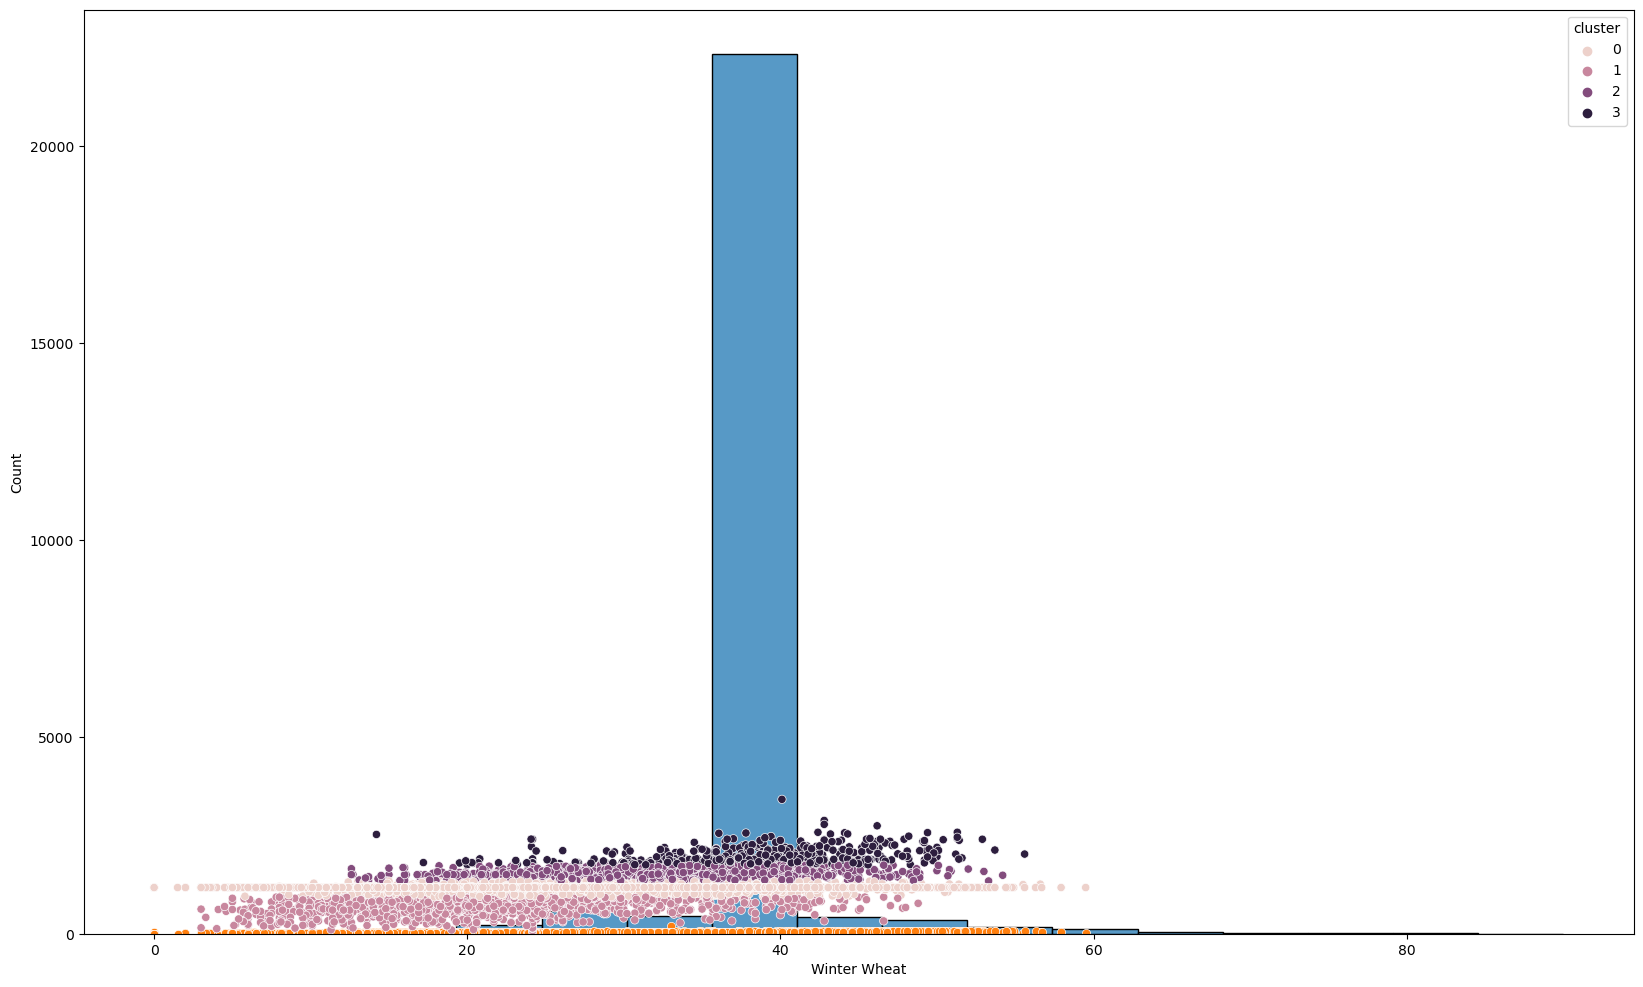

In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set figure size
plt.rcParams['figure.figsize'] = (20, 12)

# Load data
rm_crop_yields = pd.read_csv('rm_crop_yields_1938_2021.csv', encoding='utf-8')
geo_df = gpd.read_file('Rural Municipality\Rural Municipality.shp')

# Preprocess data
geo_df.rename(columns={'RMNO': 'RM'}, inplace=True)
geo_df['RM'] = geo_df['RM'].astype('int64')
df_merged = rm_crop_yields.merge(geo_df, on="RM")

# Impute missing values
columns_with_missing_values = ['Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard', 'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye', 'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas']
for column_name in columns_with_missing_values:
    df_merged[column_name].fillna(df_merged[column_name].mean(), inplace=True)

# Exploratory data analysis
sns.histplot(data=df_merged, x='Winter Wheat')
sns.scatterplot(data=df_merged, x='Canola', y='Spring Wheat')

# KMeans clustering
k = 4
features = ['Canola', 'Durum', 'Lentils', 'Peas']
data = df_merged[features]
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
df_merged['cluster'] = kmeans.labels_
sns.scatterplot(data=df_merged, x='Canola', y='Lentils', hue='cluster')

# Remove unnecessary columns
df_merged.drop(['EFFDT', 'FEATURECD', 'RMNM', 'EXPDT', 'geometry'], axis=1, inplace=True)

# Random forest regression
X = df_merged.drop(['Lentils'], axis=1)
y = df_merged['Lentils']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rf = RandomForestRegressor(n_estimators=100,
                           max_depth=5,
                           random_state=101)
scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
rf.fit(X_scaled_train, y_train)

# Evaluate model performance
y_pred = rf.predict(X_scaled_test)
accuracy = rf.score(X_scaled_test, y_test)
print('Model accuracy: {:.3f}'.format(accuracy))

Model accuracy: 0.890


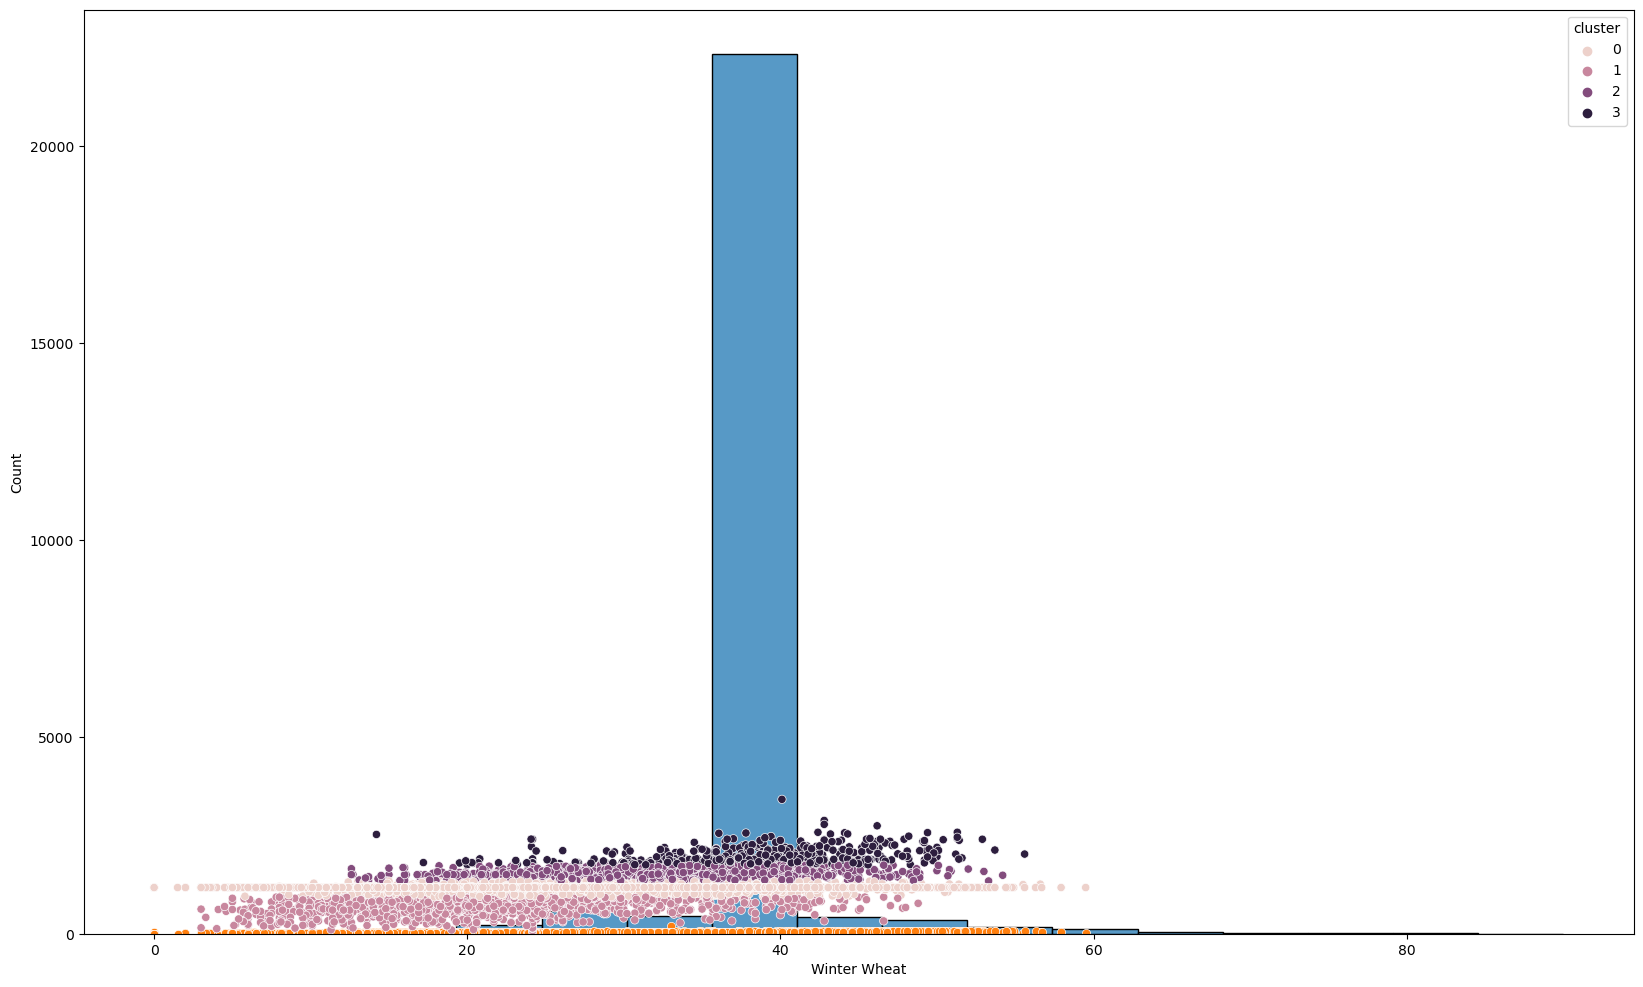

In [2]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set figure size
plt.rcParams['figure.figsize'] = (20, 12)

# Load data
rm_crop_yields = pd.read_csv('rm_crop_yields_1938_2021.csv', encoding='utf-8')
geo_df = gpd.read_file('Rural Municipality\Rural Municipality.shp')

# Preprocess data
geo_df.rename(columns={'RMNO': 'RM'}, inplace=True)
geo_df['RM'] = geo_df['RM'].astype('int64')
df_merged = rm_crop_yields.merge(geo_df, on="RM")

# Impute missing values
columns_with_missing_values = ['Winter Wheat', 'Canola', 'Spring Wheat', 'Mustard', 'Durum', 'Sunflowers', 'Oats', 'Lentils', 'Peas', 'Barley', 'Fall Rye', 'Canary Seed', 'Spring Rye', 'Tame Hay', 'Flax', 'Chickpeas']
for column_name in columns_with_missing_values:
    df_merged[column_name].fillna(df_merged[column_name].mean(), inplace=True)

# Exploratory data analysis
sns.histplot(data=df_merged, x='Winter Wheat')
sns.scatterplot(data=df_merged, x='Canola', y='Spring Wheat')

# KMeans clustering
k = 4
features = ['Canola', 'Durum', 'Lentils', 'Peas']
data = df_merged[features]
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
df_merged['cluster'] = kmeans.labels_
sns.scatterplot(data=df_merged, x='Canola', y='Lentils', hue='cluster')

# Remove unnecessary columns
df_merged.drop(['EFFDT', 'FEATURECD', 'RMNM', 'EXPDT', 'geometry'], axis=1, inplace=True)

# Random forest regression
X = df_merged.drop(['Lentils'], axis=1)
y = df_merged['Lentils']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rf = RandomForestRegressor(n_estimators=100,
                           max_depth=5,
                           random_state=101)
scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
rf.fit(X_scaled_train, y_train)

# Evaluate model performance
y_pred = rf.predict(X_scaled_test)
accuracy = rf.score(X_scaled_test, y_test)
print('Model accuracy: {:.3f}'.format(accuracy))

In [8]:
rm_crop_yields


,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.00,NaN,NaN,NaN,1.00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.00,NaN,NaN,NaN,16.00,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.00,NaN,NaN,NaN,23.00,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.00,NaN,NaN,NaN,32.00,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.00,NaN,NaN,NaN,35.00,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN
25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.3,NaN,NaN,NaN,NaN,NaN,NaN
